In [56]:
# Importing data
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [57]:
# Get row and column count
train.shape

(103904, 25)

In [58]:
# Get a snapshot of data
train.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [59]:
# Drop unnecessary columns
train = train.drop('Unnamed: 0', axis=1)
train = train.drop('id', axis=1)
test = test.drop('Unnamed: 0', axis=1)
test = test.drop('id', axis=1)
# Check size of the data set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [60]:
train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [61]:
# Replace spaces in the column names with underscore
train.columns = [c.replace(' ', '_') for c in train.columns]
test.columns = [c.replace(' ', '_') for c in test.columns]

In [62]:
test['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
train['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

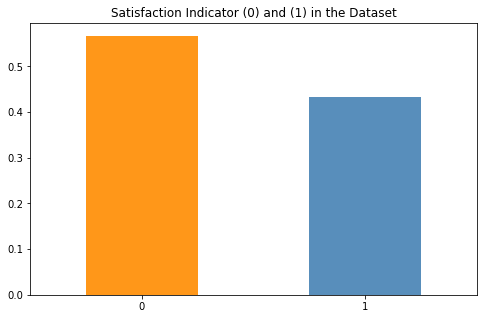

In [63]:
# Checking the nature of data set: balanced or imbalanced?
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

In [64]:
# Missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival_Delay_in_Minutes,310,0.002984
satisfaction,0,0.000000
Food_and_drink,0,0.000000
Customer_Type,0,0.000000
Age,0,0.000000


In [65]:
# Imputing missing value with mean
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(train['Arrival_Delay_in_Minutes'].mean())

In [66]:
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(test['Arrival_Delay_in_Minutes'].mean())

In [67]:
# Replace NaN with mode for categorical variables
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

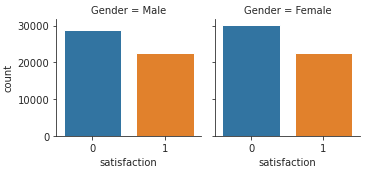

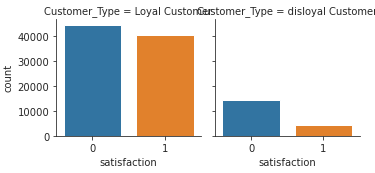

In [68]:
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)  
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)

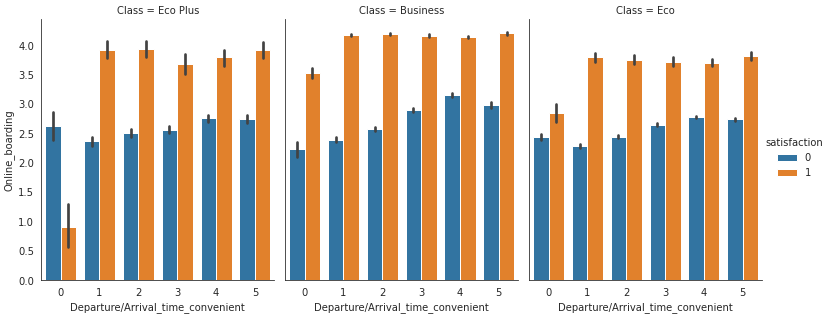

In [69]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

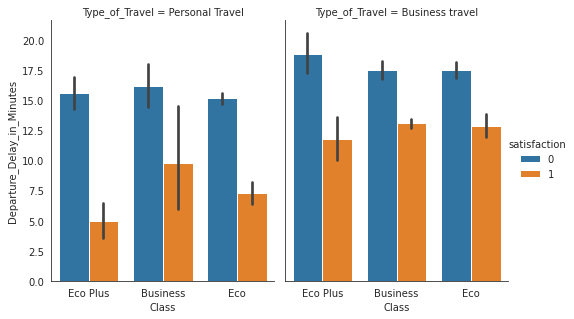

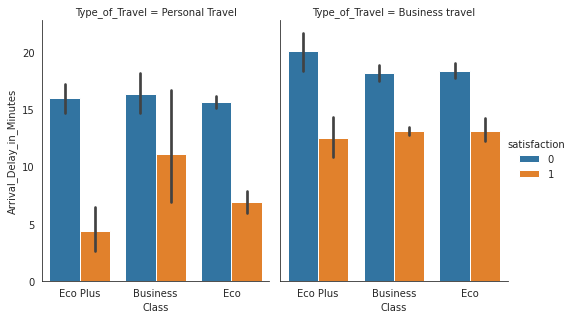

In [70]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=.8)

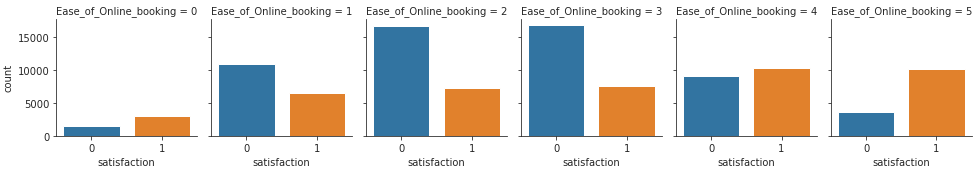

In [71]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=.9)

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat_comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food_and_drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

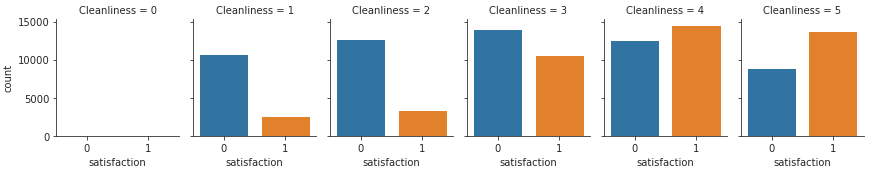

In [72]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

In [73]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [74]:
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

<AxesSubplot:>

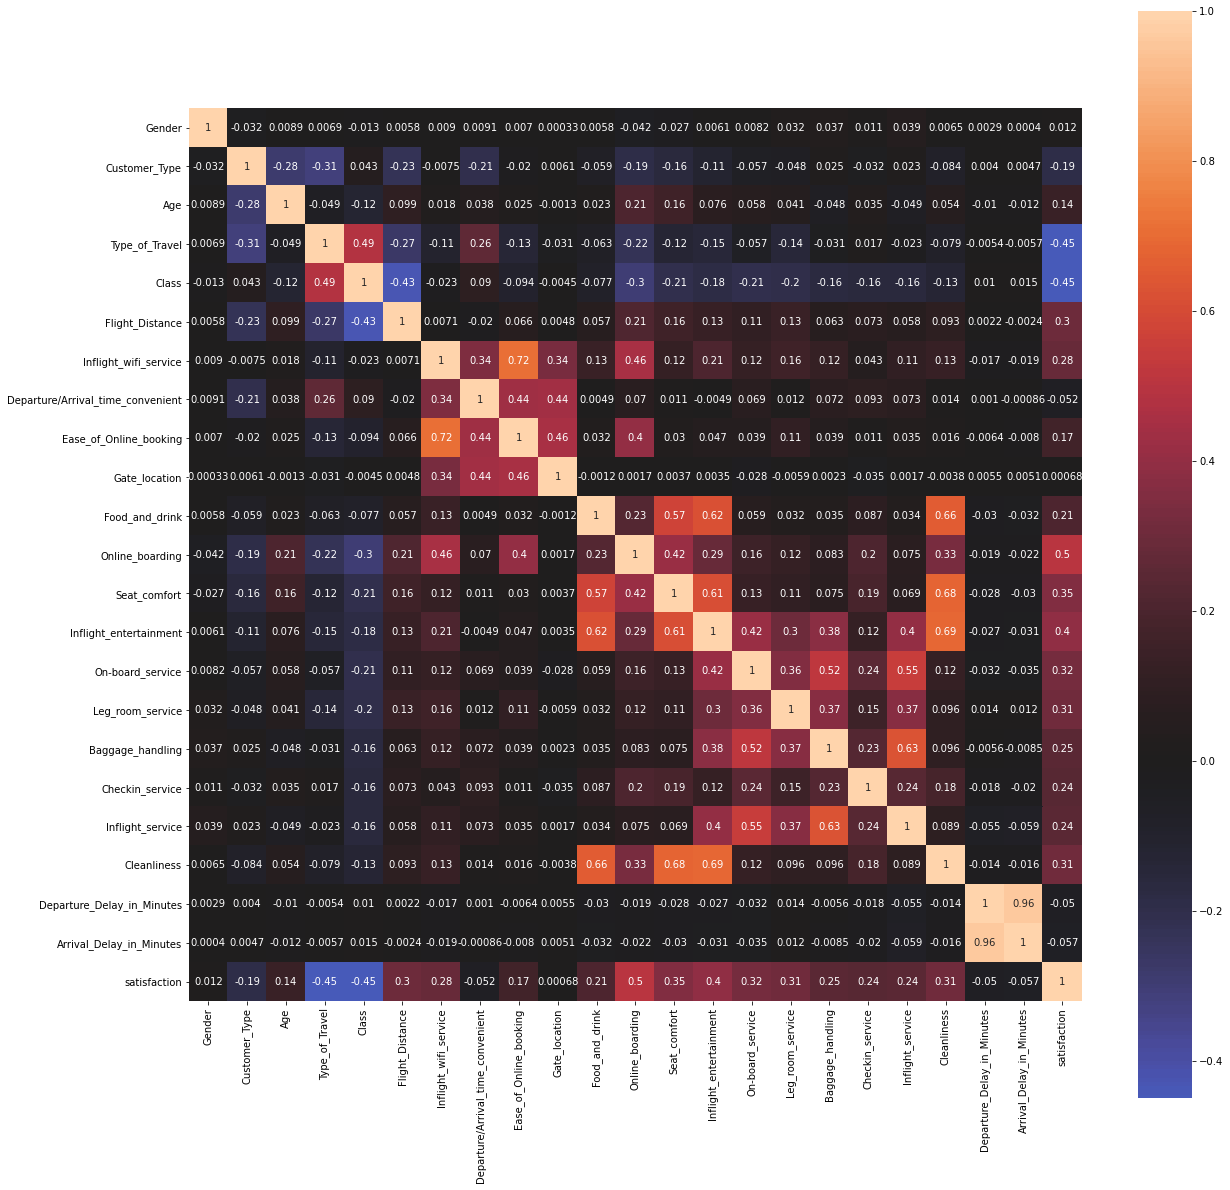

In [75]:
corr = train.corr()

f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr,  vmax=None, center=0,square=True, annot=True)

In [76]:
corr.sort_values(["satisfaction"], ascending = False, inplace = True)
print(corr.satisfaction)

satisfaction                         1.000000
Online_boarding                      0.503557
Inflight_entertainment               0.398059
Seat_comfort                         0.349459
On-board_service                     0.322383
Leg_room_service                     0.313131
Cleanliness                          0.305198
Flight_Distance                      0.298780
Inflight_wifi_service                0.284245
Baggage_handling                     0.247749
Inflight_service                     0.244741
Checkin_service                      0.236174
Food_and_drink                       0.209936
Ease_of_Online_booking               0.171705
Age                                  0.137167
Gender                               0.012211
Gate_location                        0.000682
Departure_Delay_in_Minutes          -0.050494
Departure/Arrival_time_convenient   -0.051601
Arrival_Delay_in_Minutes            -0.057497
Customer_Type                       -0.187638
Type_of_Travel                    

### Outliers Detection and Removal

In [77]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1329.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [78]:
# Removing outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(61197, 23)

<AxesSubplot:>

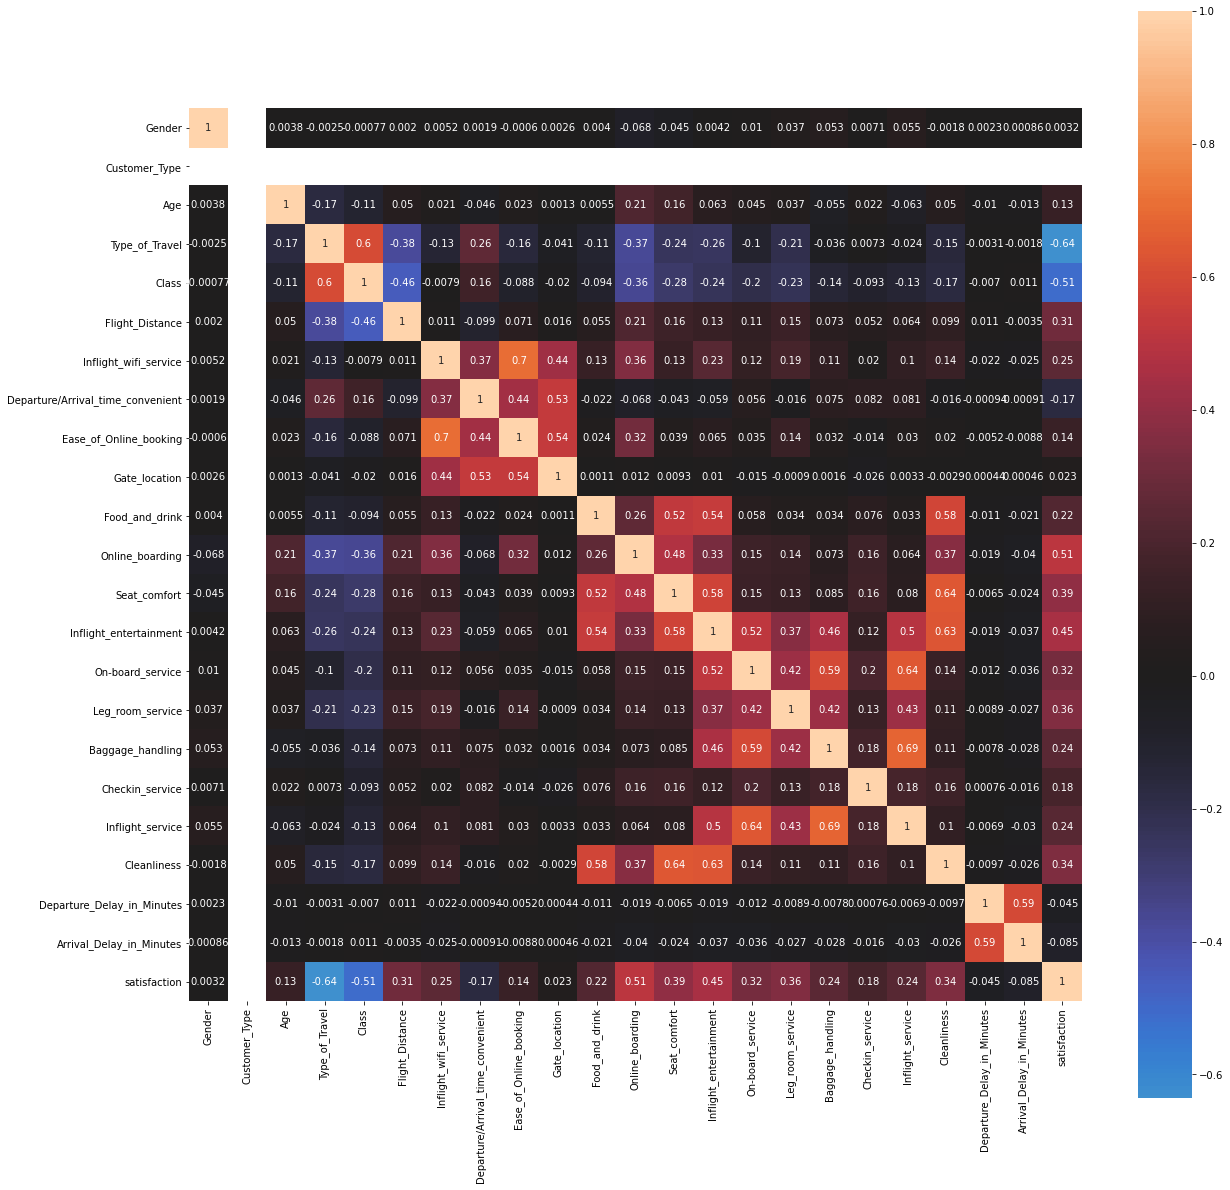

In [79]:
corr = train.corr()

f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr,  vmax=None, center=0,square=True, annot=True)

In [80]:
corr.sort_values(["satisfaction"], ascending = False, inplace = True)
print(corr.satisfaction)

satisfaction                         1.000000
Online_boarding                      0.512163
Inflight_entertainment               0.453827
Seat_comfort                         0.393032
Leg_room_service                     0.357199
Cleanliness                          0.342822
On-board_service                     0.323760
Flight_Distance                      0.305225
Inflight_wifi_service                0.254764
Baggage_handling                     0.242559
Inflight_service                     0.235862
Food_and_drink                       0.221220
Checkin_service                      0.184270
Ease_of_Online_booking               0.140467
Age                                  0.128637
Gate_location                        0.022789
Gender                               0.003205
Departure_Delay_in_Minutes          -0.044781
Arrival_Delay_in_Minutes            -0.084502
Departure/Arrival_time_convenient   -0.169169
Class                               -0.513447
Type_of_Travel                    

In [81]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [88]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve 
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
   
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc

Accuracy = 0.8132891900215584
ROC Area under Curve = 0.8201667535234151
              precision    recall  f1-score   support

           0    0.88771   0.76381   0.82111     14573
           1    0.74384   0.87652   0.80475     11403

    accuracy                        0.81329     25976
   macro avg    0.81578   0.82017   0.81293     25976
weighted avg    0.82455   0.81329   0.81393     25976



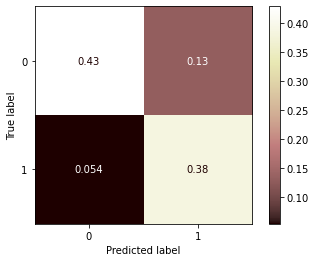

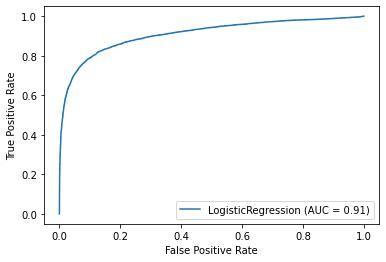

In [90]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8941330458885125
ROC Area under Curve = 0.9003728693084586
              precision    recall  f1-score   support

           0    0.95723   0.84924   0.90001     14573
           1    0.83161   0.95150   0.88753     11403

    accuracy                        0.89413     25976
   macro avg    0.89442   0.90037   0.89377     25976
weighted avg    0.90208   0.89413   0.89453     25976



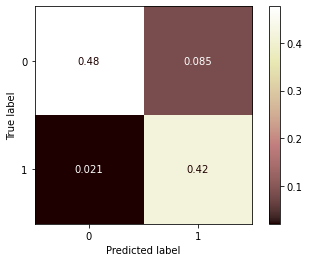

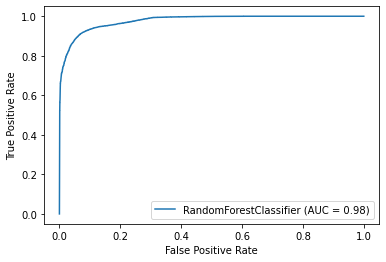

In [91]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)